In [1]:
import pandas as pd

In [2]:
transactions = pd.read_csv('transactions1.csv')
transactions.head(8)

,Transaction_ID,Customer_ID,Purchase_Amount,Date
0,TRANS0001,CUST007,289.47,2024-02-05
1,TRANS0002,CUST010,181.37,2024-02-08
2,TRANS0003,CUST005,178.25,2024-02-05
3,TRANS0004,CUST003,357.46,2024-03-02
4,TRANS0005,CUST002,203.85,2024-02-23
5,TRANS0006,CUST008,403.68,2024-02-02
6,TRANS0007,CUST009,409.53,2024-02-07
7,TRANS0008,CUST001,197.69,2024-02-01


In [3]:
transactions.shape

(30, 4)

In [4]:
customers = pd.read_csv('customers1.csv')
customers

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia
...,...,...,...,...,...,...,...,...,...
1002,996,fulan 996,Prefer not to say,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia
1003,997,fulan 997,Prefer not to say,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia
1004,998,fulan 998,Prefer not to say,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia
1005,999,fulan 999,Prefer not to say,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia


In [5]:
newGender = ['female', 'Male', 'Male', 'Male', 'Female',
             'Male', 'Female', 'Female', 'Male', 'Female'] 
customers['Gender'] = newGender
customers

ValueError: Length of values (10) does not match length of index (1007)

In [ ]:
customers.loc[2, 'Name'] = 'Robert'
customers

,Customer_ID,Name,Age,Gender
0,CUST001,Alice,23,female
1,CUST002,Bob,49,Male
2,CUST003,Robert,57,Male
3,CUST004,David,40,Male
4,CUST005,Emma,23,Female
5,CUST006,Frank,26,Male
6,CUST007,Grace,46,Female
7,CUST008,Hannah,45,Female
8,CUST009,Isaac,42,Male
9,CUST010,Julia,46,Female


In [ ]:
customers.shape # we have 10 customers 

(10, 4)

In [ ]:
#join the transaction and the customers dataframe
df = pd.merge(transactions,customers, on='Customer_ID', how='left')
df.head()

,Transaction_ID,Customer_ID,Purchase_Amount,Date,Name,Age,Gender
0,TRANS0001,CUST007,289.47,2024-02-05,Grace,46,Female
1,TRANS0002,CUST010,181.37,2024-02-08,Julia,46,Female
2,TRANS0003,CUST005,178.25,2024-02-05,Emma,23,Female
3,TRANS0004,CUST003,357.46,2024-03-02,Robert,57,Male
4,TRANS0005,CUST002,203.85,2024-02-23,Bob,49,Male


#excercise
* create a reviews dataframe from review.csv
* then, join the reviews and the df dataframe

In [ ]:
reviews = pd.read_csv('reviews1.csv')
reviews

,Customer_ID,Rating,Feedback
0,CUST010,3,Excellent!
1,CUST001,1,Excellent!
2,CUST003,5,Excellent!
3,CUST002,5,Excellent!
4,CUST009,1,Not satisfied
5,CUST007,5,Good experience
6,CUST006,2,Average


In [ ]:
reviews.shape

(7, 3)

In [ ]:
newRating =[4,2,4]
newFeedback = ['Good', 'Bad', 'Good']
reviews.loc[0:2, 'Reting'] = newRating
reviews.loc[0:2, 'Feedback'] = newFeedback
reviews

,Customer_ID,Rating,Feedback,Reting
0,CUST010,3,Good,4.0
1,CUST001,1,Bad,2.0
2,CUST003,5,Good,4.0
3,CUST002,5,Excellent!,NaN
4,CUST009,1,Not satisfied,NaN
5,CUST007,5,Good experience,NaN
6,CUST006,2,Average,NaN


In [ ]:
df = pd.merge(df, reviews, on='Customer_ID', how='left') #df before the join left
df.head()

,Transaction_ID,Customer_ID,Purchase_Amount,Date,Name,Age,Gender,Rating,Feedback,Reting
0,TRANS0001,CUST007,289.47,2024-02-05,Grace,46,Female,5.0,Good experience,NaN
1,TRANS0002,CUST010,181.37,2024-02-08,Julia,46,Female,3.0,Good,4.0
2,TRANS0003,CUST005,178.25,2024-02-05,Emma,23,Female,NaN,NaN,NaN
3,TRANS0004,CUST003,357.46,2024-03-02,Robert,57,Male,5.0,Good,4.0
4,TRANS0005,CUST002,203.85,2024-02-23,Bob,49,Male,5.0,Excellent!,NaN


In [ ]:
df.to_csv('marge_data.csv') #save new data

In [ ]:
filt= df['Gender'] == 'Female'
df[filt].describe

<bound method NDFrame.describe of    Transaction_ID Customer_ID  Purchase_Amount        Date    Name  Age  \
0       TRANS0001     CUST007           289.47  2024-02-05   Grace   46   
1       TRANS0002     CUST010           181.37  2024-02-08   Julia   46   
2       TRANS0003     CUST005           178.25  2024-02-05    Emma   23   
5       TRANS0006     CUST008           403.68  2024-02-02  Hannah   45   
8       TRANS0009     CUST007           436.41  2024-02-21   Grace   46   
11      TRANS0012     CUST010           371.66  2024-02-13   Julia   46   
13      TRANS0014     CUST007           377.70  2024-02-04   Grace   46   
22      TRANS0023     CUST005           178.95  2024-02-17    Emma   23   
23      TRANS0024     CUST007            10.42  2024-03-01   Grace   46   
25      TRANS0026     CUST010           118.77  2024-03-01   Julia   46   

    Gender  Rating         Feedback  Reting  
0   Female     5.0  Good experience     NaN  
1   Female     3.0             Good     4.0  
2 

Exercise
- get a datafrme that only consist of customers with name 'Grace'

In [ ]:
filt = df['Name'] == 'Grace'
df[filt]

,Transaction_ID,Customer_ID,Purchase_Amount,Date,Name,Age,Gender,Rating,Feedback,Reting
0,TRANS0001,CUST007,289.47,2024-02-05,Grace,46,Female,5.0,Good experience,NaN
8,TRANS0009,CUST007,436.41,2024-02-21,Grace,46,Female,5.0,Good experience,NaN
13,TRANS0014,CUST007,377.70,2024-02-04,Grace,46,Female,5.0,Good experience,NaN
23,TRANS0024,CUST007,10.42,2024-03-01,Grace,46,Female,5.0,Good experience,NaN


In [ ]:
filt = df['Name'] == 'Grace'
df[filt].sum()

Transaction_ID                  TRANS0001TRANS0009TRANS0014TRANS0024
Customer_ID                             CUST007CUST007CUST007CUST007
Purchase_Amount                                               1114.0
Date                        2024-02-052024-02-212024-02-042024-03-01
Name                                            GraceGraceGraceGrace
Age                                                              184
Gender                                      FemaleFemaleFemaleFemale
Rating                                                          20.0
Feedback           Good experienceGood experienceGood experienceG...
Reting                                                           0.0
dtype: object

In [ ]:
from pandas_datareader import data #importing pandas data_reader bto access an online database
import pandas_datareader.data as web
import matplotlib.pyplot as plt #plt and seaborn are visualization libraries
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Paired')
#import warnings 
#warnings.filterwarnings('ignore')
import datetime as dt #importing datatime library

In [ ]:
from pandas_datareader import wb # the worldbank code in pandas_datareader is web
matches = wb.search('gdp.*capita.*const')
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX', 'ID'], start=2018, end=2024)
dat

C:\Users\Asus\AppData\Local\Temp\ipykernel_16512\3734530274.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX', 'ID'], start=2018, end=2024)


NY.GDP.PCAP.KD
country       year                
Canada        2023    44468.747502
              2022    45227.144735
              2021    44359.616727
              2020    42366.128519
              2019    45100.291490
              2018    44907.343684
Indonesia     2023     4192.623902
              2022     4024.920743
              2021     3850.688773
              2020     3739.449066
              2019     3850.903218
              2018     3701.321555
Mexico        2023    10241.894511
              2022    10011.254538
              2021     9728.056800
              2020     9234.643625
              2019    10159.444836
              2018    10296.869094
United States 2023    65875.177881
              2022    64342.117938
              2021    62996.289384
              2020    59493.145982
              2019    61400.548154
              2018    60127.210276

In [ ]:
df = dat.reset_index()
df

,country,year,NY.GDP.PCAP.KD
0,Canada,2023,44468.747502
1,Canada,2022,45227.144735
2,Canada,2021,44359.616727
3,Canada,2020,42366.128519
4,Canada,2019,45100.291490
5,Canada,2018,44907.343684
6,Indonesia,2023,4192.623902
7,Indonesia,2022,4024.920743
8,Indonesia,2021,3850.688773
9,Indonesia,2020,3739.449066


In [ ]:
#sort by nation and then by year
df_s = df.sort_values(by=['nation', 'year'], ascending=[False, True], inplace=True)
df_s

KeyError: 'nation'

latihan


In [ ]:
# Import pustaka yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import wb


Matplotlib is building the font cache; this may take a moment.


In [ ]:
# 1️⃣ Ambil data GDP per kapita dari World Bank untuk tahun 2010-2023
data = wb.download(indicator='NY.GDP.PCAP.KD', 
                   country=['US', 'ID', 'CN', 'IN'],  # USA, Indonesia, China, India
                   start=2010, 
                   end=2023)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16512\1776330583.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = wb.download(indicator='NY.GDP.PCAP.KD',


In [ ]:

# 2️⃣ Ubah format data agar lebih mudah dibaca
data.reset_index(inplace=True)

In [ ]:
# 3️⃣ Ubah nama kolom agar lebih jelas
data.rename(columns={'NY.GDP.PCAP.KD': 'GDP per Capita'}, inplace=True)


<Axes: xlabel='year', ylabel='GDP per Capita'>

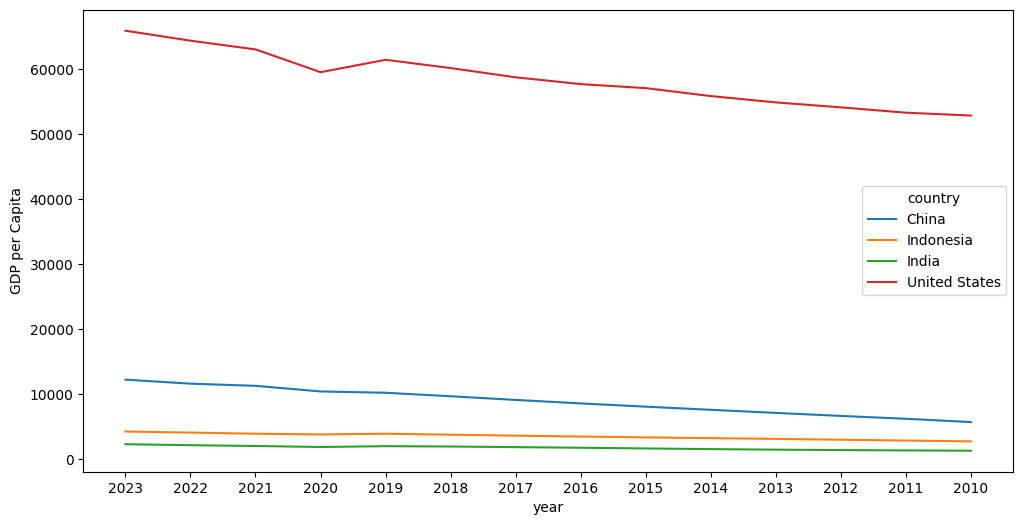

In [ ]:

# 4️⃣ Buat visualisasi menggunakan seaborn
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x="year", y="GDP per Capita", hue="country")

C:\Users\Asus\AppData\Local\Temp\ipykernel_16512\2144290167.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Negara")


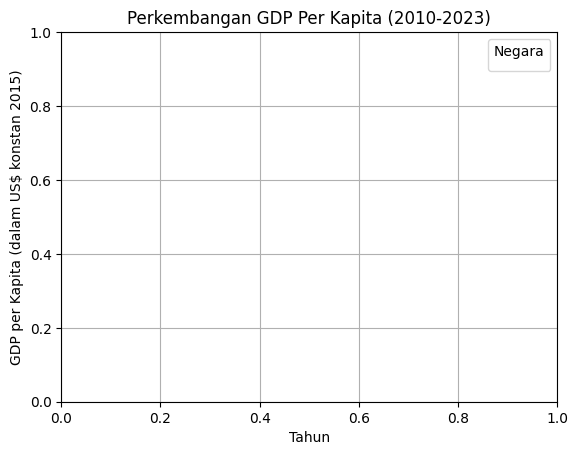

In [ ]:

# 5️⃣ Kustomisasi tampilan grafik
plt.title("Perkembangan GDP Per Kapita (2010-2023)")
plt.xlabel("Tahun")
plt.ylabel("GDP per Kapita (dalam US$ konstan 2015)")
plt.legend(title="Negara")
plt.grid(True)

# 6️⃣ Tampilkan grafik
plt.show()